In [90]:
import numpy as np
from scipy.optimize import fsolve
from numpy import radians, sin, cos
from matplotlib import pyplot as plt

%matplotlib inline

In [91]:
#known values
L1 = 9
L2 = 2.2
L3 = 4
L4 = 6
L5 = 1
L6 = 6
L7 = 10
L8 = 1
L9 = 9
L10 = 1
L11 = 6
Lx = 6.814
theta1 = radians(-90)
theta2 = radians(-105.8)
thetaA = radians(10)
thetaB = radians(2)
thetaC = radians(2)
thetaD = radians(2)

sample_guess = [
    radians(-114.7), #thetaX
    radians(-44.6), #theta3
    radians(-34.6), #theta4
    radians(-36.6), #theta5
    radians(-23.8), #theta6
    radians(-149.9), #theta7
    radians(-148.1), #theta8
    radians(-150.1), #theta9
    radians(-36.6), #theta10
    radians(-34.6), #theta11
]

In [92]:
def solveLegPos(guess, doPlot=False):

    def func(angles):

        [thetaX, theta3, theta4, theta5, theta6, theta7, theta8, theta9, theta10, theta11] = angles

        return [
            Lx*cos(thetaX) + L3*cos(theta3) - L1*cos(theta1),
            Lx*sin(thetaX) + L3*sin(theta3) - L1*sin(theta1),

            L4*cos(theta4) + L5*cos(theta5) - L6*cos(theta6) - L2*cos(theta2) + L8*cos(theta8),
            L4*sin(theta4) + L5*sin(theta5) - L6*sin(theta6) - L2*sin(theta2) + L8*sin(theta8),

            L5*cos(theta5) + L8*cos(theta8) + L9*cos(theta9) - L7*cos(theta7) - L10*cos(theta10),
            L5*sin(theta5) + L8*sin(theta8) + L9*sin(theta9) - L7*sin(theta7) - L10*sin(theta10),
            
            theta4 - theta3 - thetaA,
            theta5 - theta4 + thetaB,
            theta9 - theta8 + thetaC,
            theta11 - theta10 - thetaD
        ]

    root, infodict, ier, msg = fsolve(func, guess, full_output=1)

    [thetaX, theta3, theta4, theta5, theta6, theta7, theta8, theta9, theta10, theta11] = root

    if doPlot:
        print("error:",np.linalg.norm(func(root)))

        origin = np.zeros(2)
        vecX = np.array([Lx*cos(thetaX), Lx*sin(thetaX)])
        vec1 = np.array([L1*cos(theta1), L1*sin(theta1)])
        vec2 = np.array([L2*cos(theta2), L2*sin(theta2)])
        vec3 = np.array([L3*cos(theta3), L3*sin(theta3)])
        vec4 = np.array([L4*cos(theta4), L4*sin(theta4)])
        vec5 = np.array([L5*cos(theta5), L5*sin(theta5)])
        vec6 = np.array([L6*cos(theta6), L6*sin(theta6)])
        vec7 = np.array([L7*cos(theta7), L7*sin(theta7)])
        vec8 = np.array([L8*cos(theta8), L8*sin(theta8)])
        vec9 = np.array([L9*cos(theta9), L9*sin(theta9)])
        vec10 = np.array([L10*cos(theta10), L10*sin(theta10)])
        vec11 = np.array([L11*cos(theta11), L11*sin(theta11)])

        #[x0, y0, x1, y1]
        linkX = np.array([origin, vecX])
        link1 = np.array([origin, vec1])
        link2 = np.array([link1[1], link1[1] + vec2])
        link3 = np.array([linkX[1], linkX[1] + vec3])
        link4 = np.array([link1[1], link1[1] + vec4])
        link5 = np.array([link4[1], link4[1] + vec5])
        link6 = np.array([link2[1], link2[1] + vec6])
        link7 = np.array([link4[1], link4[1] + vec7])
        link8 = np.array([link5[1], link5[1] + vec8])
        link9 = np.array([link8[1], link8[1] + vec9])
        link10 = np.array([link7[1], link7[1] + vec10])
        link11 = np.array([link10[1], link10[1] + vec11])

        links = np.array([linkX, link1, link2, link3, link4, link5,
                        link6, link7, link8, link9, link10, link11])

        fig, ax = plt.subplots(figsize=(4, 4))
        ax.axis([-16, 16, -30, 2])
        plt.quiver(links[:, 0, 0], links[:, 0, 1], links[:, 1, 0]-links[:, 0, 0], links[:, 1, 1] - links[:, 0, 1],
                angles='xy', scale_units='xy', scale=1, width=0.005, headwidth=2)

    #return position of foot
    vec1 = np.array([L1*cos(theta1), L1*sin(theta1)])
    vec4 = np.array([L4*cos(theta4), L4*sin(theta4)])
    vec7 = np.array([L7*cos(theta7), L7*sin(theta7)])
    vec10 = np.array([L10*cos(theta10), L10*sin(theta10)])
    vec11 = np.array([L11*cos(theta11), L11*sin(theta11)])

    footpos = vec1 + vec4 + vec7 + vec10 + vec11

    return footpos, ier, root

In [148]:
def plotLinks(color, alpha, ax=plt):
    try:
        ax.set_xlim(-20, 20)
        ax.set_ylim(-38, 2)
        ax.set(adjustable='box', aspect='equal')
    except:
        ax.xlim(-18, 18)
        ax.ylim(-34, 2)

    footpos, ier, root = solveLegPos(sample_guess, doPlot=False)

    [thetaX, theta3, theta4, theta5, theta6, theta7, theta8, theta9, theta10, theta11] = root

    origin = np.zeros(2)
    vecX = np.array([Lx*cos(thetaX), Lx*sin(thetaX)])
    vec1 = np.array([L1*cos(theta1), L1*sin(theta1)])
    vec2 = np.array([L2*cos(theta2), L2*sin(theta2)])
    vec3 = np.array([L3*cos(theta3), L3*sin(theta3)])
    vec4 = np.array([L4*cos(theta4), L4*sin(theta4)])
    vec5 = np.array([L5*cos(theta5), L5*sin(theta5)])
    vec6 = np.array([L6*cos(theta6), L6*sin(theta6)])
    vec7 = np.array([L7*cos(theta7), L7*sin(theta7)])
    vec8 = np.array([L8*cos(theta8), L8*sin(theta8)])
    vec9 = np.array([L9*cos(theta9), L9*sin(theta9)])
    vec10 = np.array([L10*cos(theta10), L10*sin(theta10)])
    vec11 = np.array([L11*cos(theta11), L11*sin(theta11)])

    # [x0, y0, x1, y1]
    linkX = np.array([origin, vecX])
    link1 = np.array([origin, vec1])
    link2 = np.array([link1[1], link1[1] + vec2])
    link3 = np.array([linkX[1], linkX[1] + vec3])
    link4 = np.array([link1[1], link1[1] + vec4])
    link5 = np.array([link4[1], link4[1] + vec5])
    link6 = np.array([link2[1], link2[1] + vec6])
    link7 = np.array([link4[1], link4[1] + vec7])
    link8 = np.array([link5[1], link5[1] + vec8])
    link9 = np.array([link8[1], link8[1] + vec9])
    link10 = np.array([link7[1], link7[1] + vec10])
    link11 = np.array([link10[1], link10[1] + vec11])

    links = np.array([linkX, link1, link2, link3, link4, link5,
                    link6, link7, link8, link9, link10, link11])

    ax.quiver(links[:, 0, 0], links[:, 0, 1], links[:, 1, 0]-links[:, 0, 0], links[:, 1, 1] - links[:, 0, 1],
            angles='xy', scale_units='xy', scale=1, width=0.005, headwidth=2, alpha=alpha, color=color)

    return links


In [138]:
def try_config(min_Lx=4, max_Lx=8.4, step=0.1):


    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 4))

    ax1.scatter(0, 0)

    globals()['Lx'] = min_Lx
    plotLinks('k', 0.3, ax1)
    globals()['Lx'] = max_Lx
    plotLinks('k', 0.3, ax1)

    foot_xs = []
    foot_ys = []
    Lxs = []

    for testcase in np.arange(min_Lx, max_Lx, step=step):
        globals()['Lx'] = testcase
        footpos, ier, root = solveLegPos(sample_guess, doPlot=False)

        if ier==1:

            plotLinks('k', 0.1, ax1)

            foot_xs.append(footpos[0])
            foot_ys.append(footpos[1])
            Lxs.append(testcase)

    foot_vs = []
    for i in range(1, len(foot_xs)):
        foot_vs.append(np.linalg.norm([foot_xs[i] - foot_xs[i-1], foot_ys[i] - foot_ys[i-1]]))

    foot_xs = foot_xs[1:]
    foot_ys = foot_ys[1:]
    Lxs = Lxs[1:]

    ax1.scatter(foot_xs, foot_ys, c=foot_vs, s=10)

    # ma = [1/x for x in foot_vs]

    ma = []
    for x in foot_vs:
        if x != 0:
            ma.append(1/x)
        else:
            ma.append(999)

    contractions = [max_Lx - Lxi for Lxi in Lxs]

    ax2.plot(contractions, ma, 'o')
    ax2.set_xlim(0, max_Lx-min_Lx)
    ax2.set_xlabel('TSA contraction')
    ax2.set_ylabel('mech advantage')

    y_travel = max(foot_ys) - min(foot_ys)
    return y_travel

![title](linkvars.png)

13.733656234112793

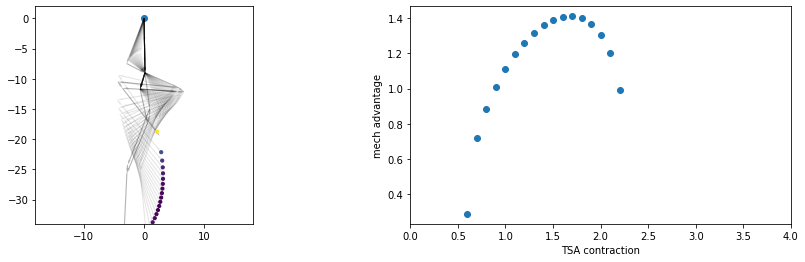

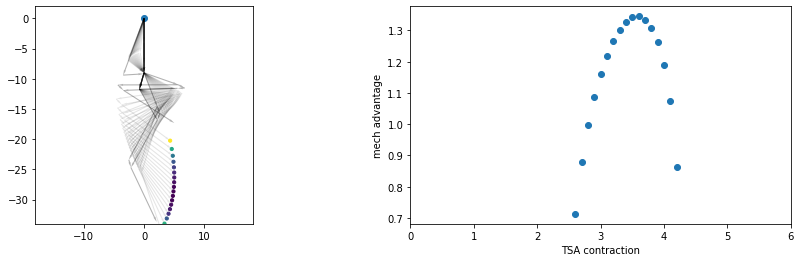

In [139]:
try_config(min_Lx=4, max_Lx=8, step=0.1)
#changed values
L1 = 9
L2 = 2.8
L3 = 3.4
L4 = 6
L5 = 1.2
L6 = 6
L7 = 10
L8 = 1.2
L9 = 9
L10 = 1.3
L11 = 10
theta1 = radians(-90)
theta2 = radians(-105.8)
thetaA = radians(10)
thetaB = radians(2)
thetaC = radians(2)
thetaD = radians(10)
try_config(min_Lx=4, max_Lx=10, step=0.1)

In [144]:
from scipy.optimize import fmin_l_bfgs_b
def objective(param, min_Lx=4, max_Lx=8, step=0.1, doPlot=False):
    g = globals()
    g['L1'] = param[0]
    g['L2'] = param[1]
    g['L3'] = param[2]
    g['L4'] = param[3]
    g['L5'] = param[4]
    g['L6'] = param[5]
    g['L7'] = param[6]
    g['L8'] = param[7]
    g['L9'] = param[8]
    g['L10'] = param[9]
    g['L11'] = param[10]
    g['theta1'] = param[11]
    g['theta2'] = param[12]
    g['thetaA'] = param[13]
    g['thetaB'] = param[13]
    g['thetaC'] = param[14]
    g['thetaD'] = param[15]

    foot_ys = []

    for testcase in np.arange(min_Lx, max_Lx, step=step):
        g['Lx'] = testcase
        footpos, ier, root = solveLegPos(sample_guess, doPlot=False)

        if ier==1:
            if(doPlot): plotLinks('k', 0.1)
            foot_ys.append(footpos[1])
    if len(foot_ys)==0: return 100

    
    return 100 - (max(foot_ys) - min(foot_ys))

x0 = [9, 2.8, 3.4, 6, 1.2, 6, 10, 1.2, 9, 1.3, 10, radians(-90), radians(-105.8), radians(10), radians(2), radians(2), radians(10)]

objective(x0)


86.11093172315339

In [121]:
res = fmin_l_bfgs_b(objective, x0, approx_grad=True, disp=True, maxiter=5)

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           17     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.61109D+01    |proj g|=  7.23333D+01


 This problem is unconstrained.



At iterate    1    f=  8.55840D+01    |proj g|=  7.10463D+01

At iterate    2    f=  8.36692D+01    |proj g|=  4.36584D+02

At iterate    3    f=  8.35917D+01    |proj g|=  3.34160D+02

At iterate    4    f=  8.35250D+01    |proj g|=  2.78121D+02

At iterate    5    f=  8.35080D+01    |proj g|=  2.66678D+02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   17      5     33      1     0     0   2.667D+02   8.351D+01
  F =   83.507964100543035     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


In [141]:
print(res)
objective(res[0])

(array([ 8.9931839 ,  2.79971467,  3.4037321 ,  6.00615432,  1.20308221,
        5.9937161 , 10.00537902,  1.19105397,  8.99482053,  1.30325043,
       10.00005633, -1.55343302, -1.8629825 ,  0.18544841,  0.03776224,
        0.03670929,  0.17453293]), 83.50796410054303, {'grad': array([-8.12721357e+01,  1.62482693e+01,  3.03332330e+01,  9.13269025e+01,
        7.61051770e+01, -9.82797906e+01, -4.22478444e+00, -8.81098222e+01,
        3.09005773e+00,  6.23092977e+00, -1.70477662e-01,  2.64862031e+02,
       -2.66678062e+02,  2.05850829e+02, -3.36279697e+00, -4.67449155e+00,
        0.00000000e+00]), 'task': 'STOP: TOTAL NO. of ITERATIONS REACHED LIMIT', 'funcalls': 576, 'nit': 5, 'warnflag': 1})


83.50796410054303

8.99318390374659
15.727806450562284


83.50796410054303

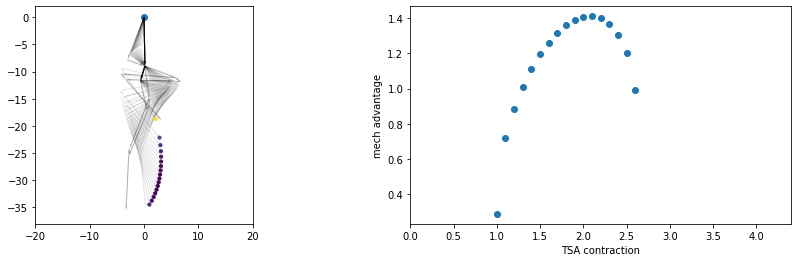

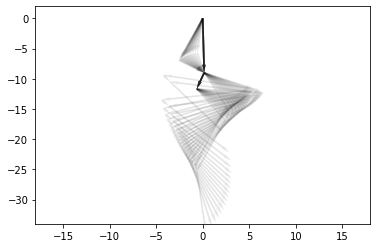

In [149]:
print(L1)
print(try_config())
f, ax = plt.subplots()
objective(res[0], doPlot=True)